In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import  datetime
import seaborn as sns
import yfinance as yf

sns.set_style("darkgrid")
sns.set(font_scale=2)

In [31]:
symbol1 = 'BRK-B'
symbol2 = 'MSFT'
ticker1 = yf.Ticker(symbol1)
ticker2 = yf.Ticker(symbol2)
dataFrame1 = ticker1.history(start="2010-1-1", actions= False, rounding=True )
dataFrame2 = ticker2.history(start="2010-1-1", actions= False, rounding=True )
ratio=dataFrame1.Close/dataFrame2.Close
spread=dataFrame1.Close - dataFrame2.Close
z_score = (ratio - ratio.mean())/ratio.std()

In [ ]:
plt.figure(figsize=(30, 12))
plt.title("Ratio plotting")
plt.plot(z_score[-1000:])
plt.axhline(z_score.mean(), color="black")
mean_Mavg100 = z_score.rolling(window=100, center=False).mean()
mean_Mavg50 = z_score.rolling(window=50, center=False).mean()
plt.plot(mean_Mavg100[-1000:], color="r")
plt.plot(mean_Mavg50[-1000:], color="g")


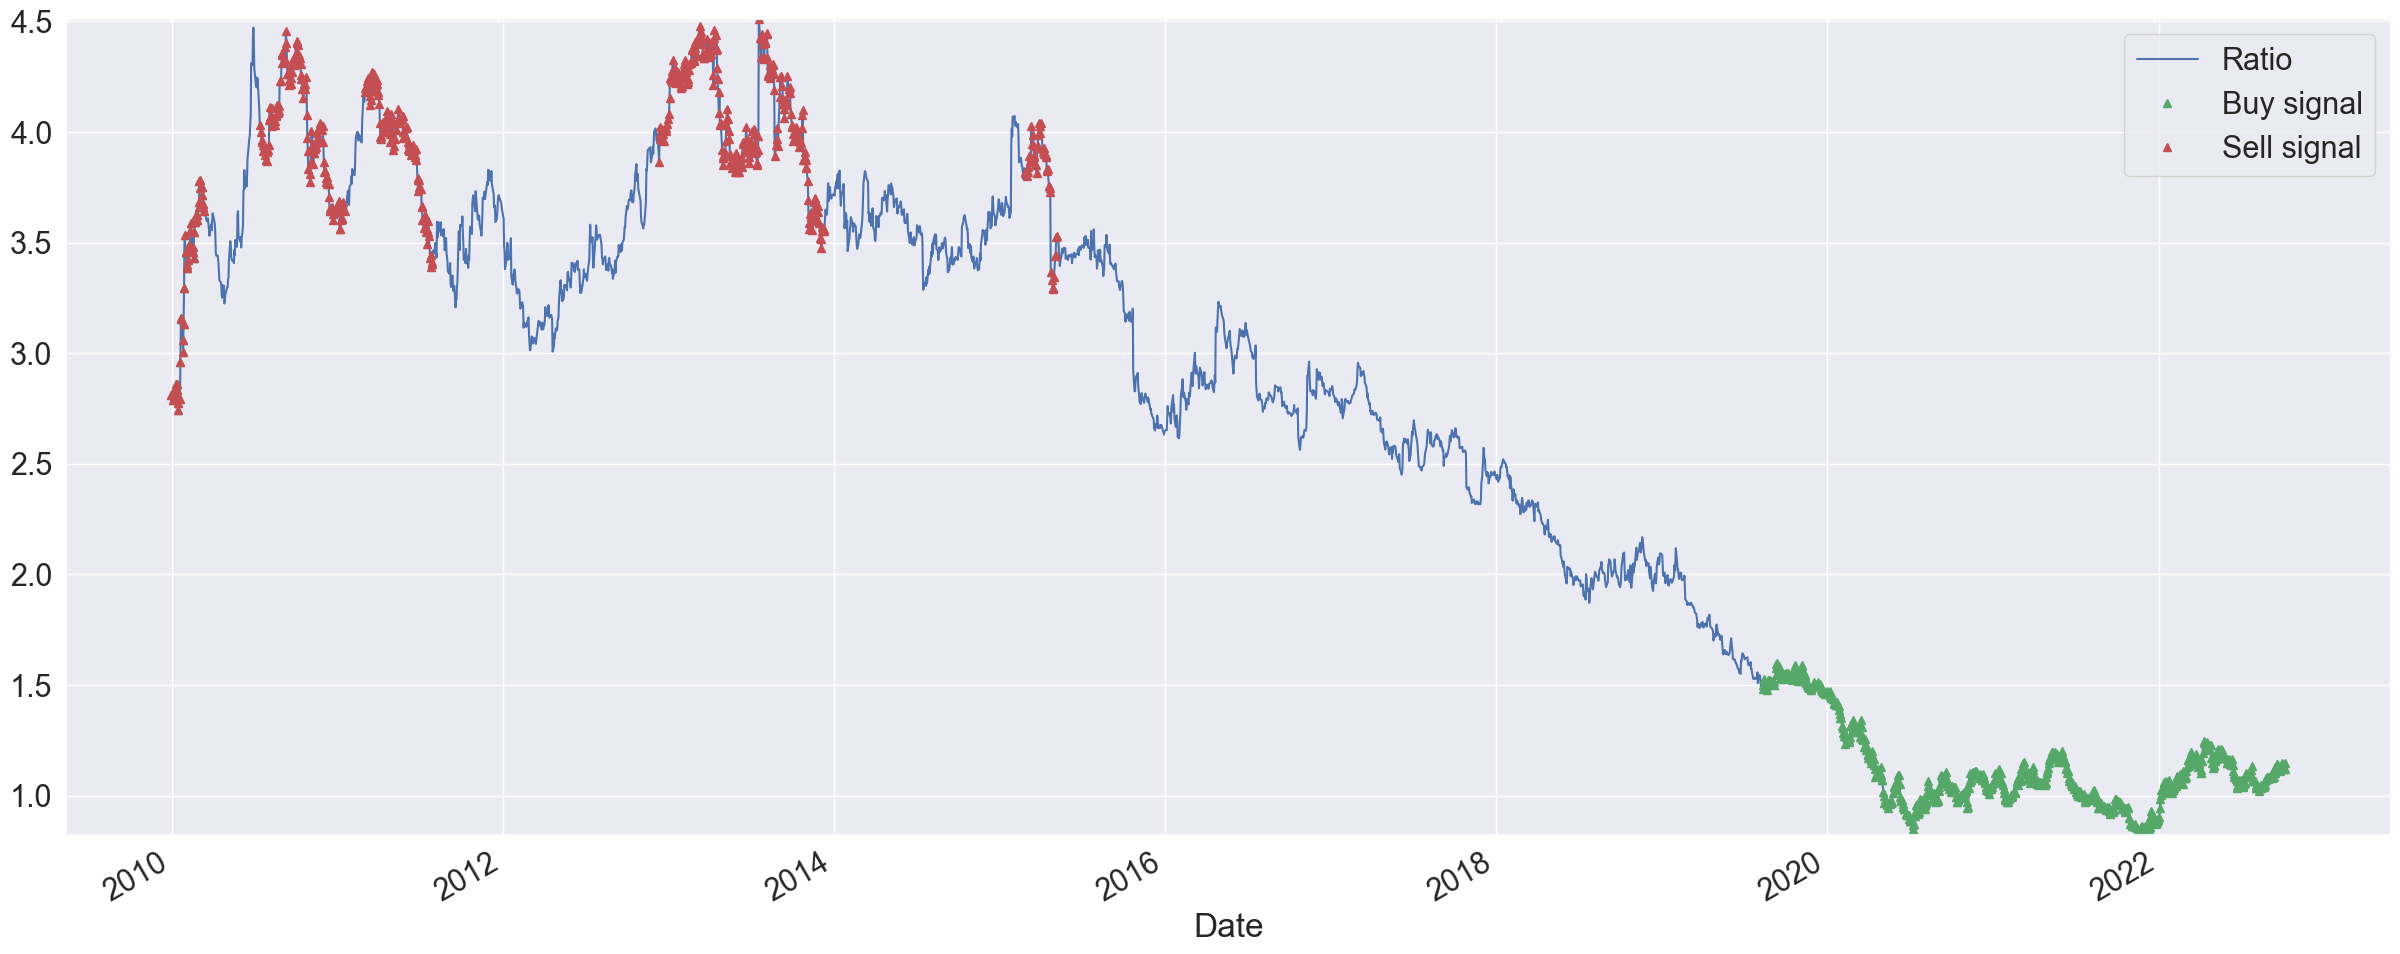

In [33]:
plt.figure(figsize=(30,12))
plt.plot(ratio)
buy = ratio.copy()
sell = ratio.copy()
buy[mean_Mavg50 > -1] = 0
sell[mean_Mavg50 < 1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="^")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2, ratio.min(), ratio.max()))
plt.legend(["Ratio", "Buy signal", "Sell signal"]);

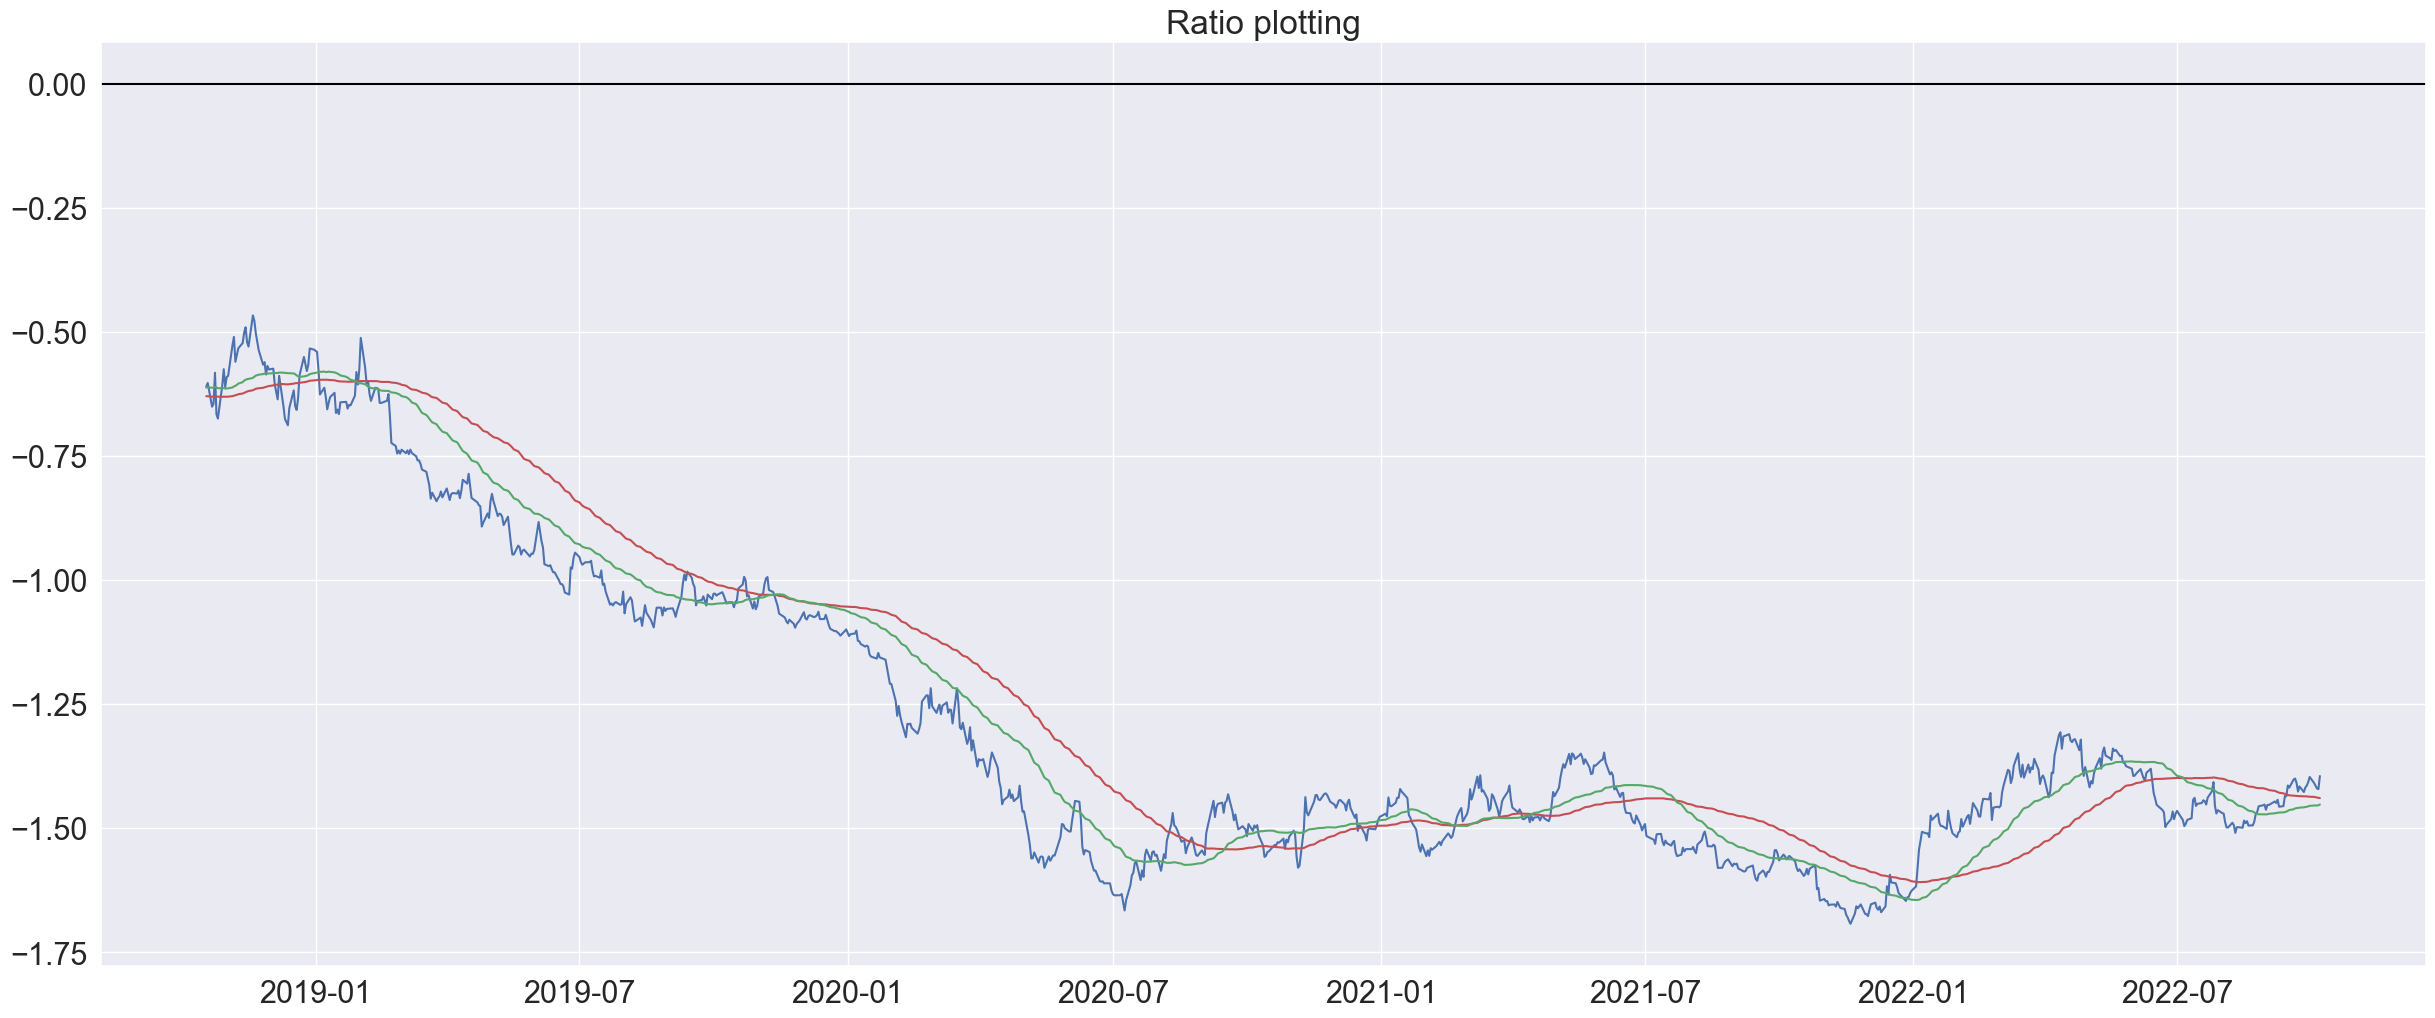

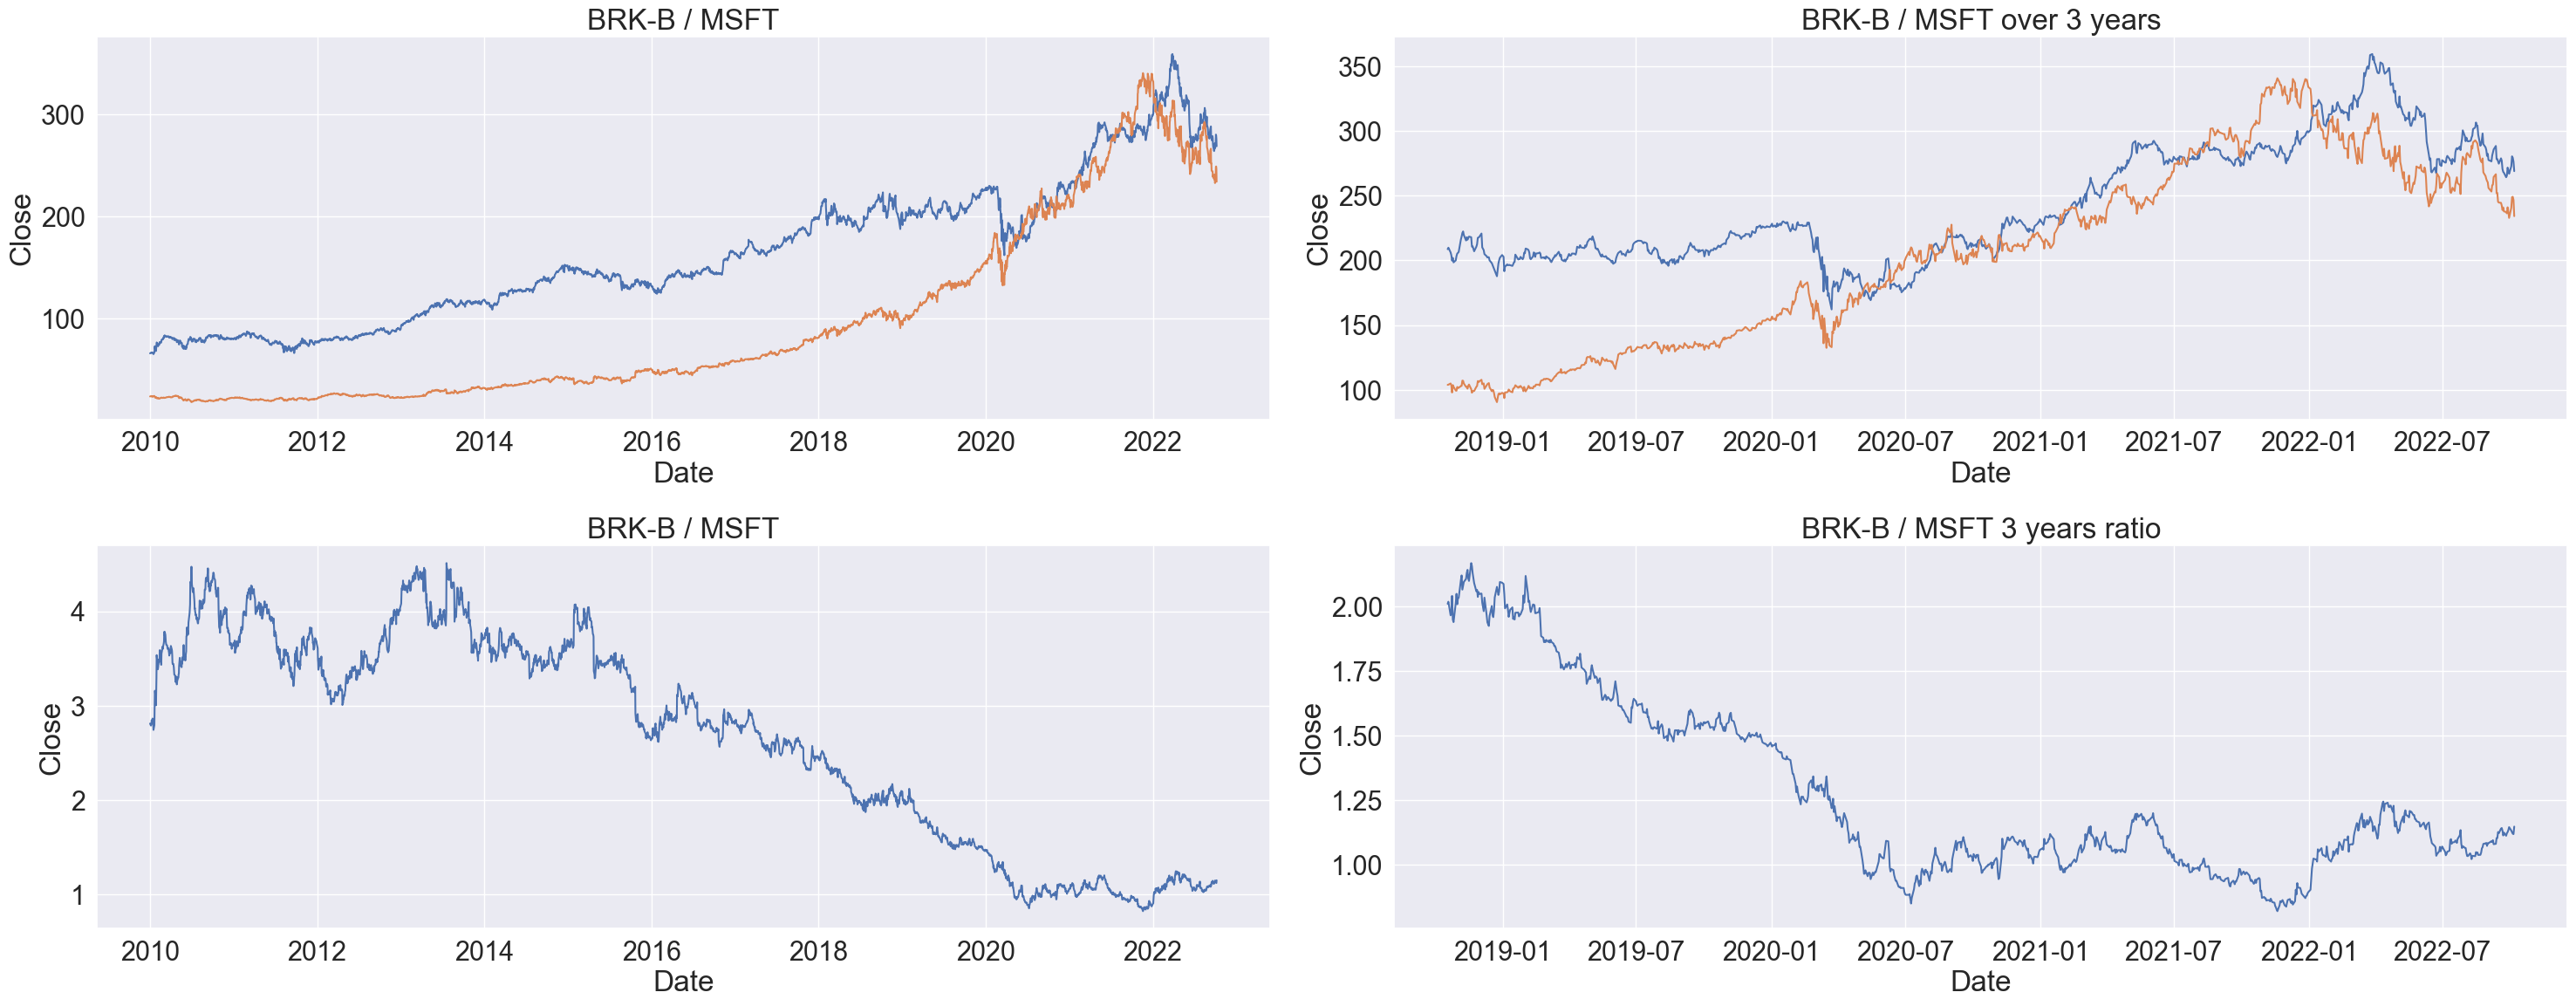

In [30]:
fig, axes = plt.subplots(2,2, figsize=(30,12))

axes[0,0].set_title(f"{symbol1} / {symbol2}")
sns.lineplot(data=dataFrame1, x="Date", y="Close", ax=axes[0,0])
sns.lineplot(data=dataFrame2, x="Date", y="Close", ax=axes[0,0])

axes[0,1].set_title(f"{symbol1} / {symbol2} over 3 years")
sns.lineplot(data=dataFrame1[-1000:], x="Date", y="Close", ax=axes[0,1])
sns.lineplot(data=dataFrame2[-1000:], x="Date", y="Close", ax=axes[0,1])

axes[1,0].set_title(f"{symbol1} / {symbol2}")
sns.lineplot(data=ratio, ax=axes[1,0])
axes[1,1].set_title(f"{symbol1} / {symbol2} 3 years ratio")
sns.lineplot(data=ratio[-1000:], ax=axes[1,1])

plt.tight_layout(pad=1);
